### 決定木の実装

#### データの準備

In [1]:
# データの読み込み
from pandas import DataFrame
from sklearn.datasets import load_breast_cancer
from IPython.core.display import display

breast_cancer = load_breast_cancer()
X = breast_cancer.data[:,:10]
y = breast_cancer.target

columns = ['半径', 'テクスチャ', '周囲の長さ', '面積', 'なめらかさ', 'コンパクト性', 'へこみ', 'へこみの数', '対称性', 'フラクタル次元']

df = DataFrame(data=X[:,:10], columns=columns)
df['目的変数'] = y

display(df.head())

,半径,テクスチャ,周囲の長さ,面積,なめらかさ,コンパクト性,へこみ,へこみの数,対称性,フラクタル次元,目的変数
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


In [2]:
# 使用するデータの抽出
# dfの全行、最後の1列以外を取得
X = df.iloc[:,0:-1]
display(X.head())
y = df['目的変数']
display(y.head())

,半径,テクスチャ,周囲の長さ,面積,なめらかさ,コンパクト性,へこみ,へこみの数,対称性,フラクタル次元
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


0    0
1    0
2    0
3    0
4    0
Name: 目的変数, dtype: int64

In [3]:
# 訓練データとテストデータに分割する
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# 決定木に標準化は必要無いが練習のため行う
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# 訓練データの標準偏差を計算
sc.fit(X_train)

# 訓練データの標準化
X_train_std = sc.transform(X_train)
# テストデータの標準化は訓練データの標準偏差を用いて行う必要がある
X_test_std = sc.transform(X_test)

display(X_train_std.shape)
display(X_train_std.mean(axis=0))
display(X_train_std.std(axis=0))

(398, 10)

array([ 2.67792488e-16, -5.53437809e-16, -6.18154327e-16,  2.07539178e-16,
        8.92641628e-18, -9.59589750e-17, -2.09770783e-16, -1.35012046e-16,
        7.25271323e-16,  2.80066311e-16])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#### 学習

In [4]:
# scikit-learn から決定木の実装である DecisionTreeClassifier を import 
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier のインスタンスを作成
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, max_features=None, random_state=42)
'''
木の深さの最大値 (max_depth) を3。
特徴量が10個なので全ての特徴量を利用するようにしました (max_features=None)。
情報利得の計算には (criterion)、デフォルトのジニ指数を指定。
'''

'\n木の深さの最大値 (max_depth) を3。\n特徴量が10個なので全ての特徴量を利用するようにしました (max_features=None)。\n情報利得の計算には (criterion)、デフォルトのジニ指数を指定。\n'

In [5]:
# 訓練データから学習
clf.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [6]:
# テストデータを予測
pred = clf.predict(X_test_std)
# 予測の確認
print(pred)

# 確率の算出
proba = clf.predict_proba(X_test_std)
# 確率の確認
proba[0]

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


array([0.01020408, 0.98979592])

#### 評価

In [7]:
# 正解率の計算
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.9473684210526315

### 特徴量の重要度確認（最後に特徴量の重要な2つを抽出している）

range(0, 10)
[0.         0.         0.         0.         0.         0.01107828
 0.03191183 0.0364513  0.08750638 0.8330522 ]


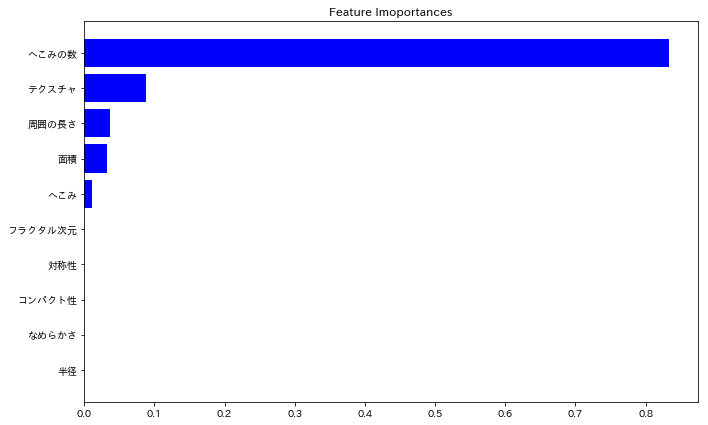

['半径' 'なめらかさ' 'コンパクト性' '対称性' 'フラクタル次元' 'へこみ' '面積' '周囲の長さ' 'テクスチャ' 'へこみの数']
['へこみの数' 'テクスチャ']


In [14]:
import numpy
from matplotlib import pyplot
# !pip install japanize_matplotlib
import japanize_matplotlib

feature_names = numpy.array(['半径', 'テクスチャ', '周囲の長さ', '面積', 'なめらかさ', 'コンパクト性', 'へこみ', 'へこみの数', '対称性', 'フラクタル次元'])
# 特徴重要度はfeature_importance_に格納されている
feature_importances = clf.feature_importances_
# ソートするが、返す値はソート前のindex、これの通りに後から並び替えたりできる
indices = numpy.argsort(feature_importances)

pyplot.figure(figsize=(11, 7))
pyplot.title('Feature Imoportances')

# barhで横向きの棒グラフの描写設定（縦はbar）,range(len(indices)):横軸9個, feature_importances[indices]:indecesの順番でプロット
print(range(len(indices)))
print(feature_importances[indices])
pyplot.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
pyplot.yticks(range(len(indices)), feature_names[indices])
pyplot.show()

# 特徴量の重要度から決定領域をプロットするためのデータを決める
print(feature_names[indices])
# [::-1]で逆順に、[:2]で最初から二番目まで取り出し
two_top_name = feature_names[indices][::-1][:2]
print(two_top_name)


#### 決定領域のプロット（plot_decision_regionsでは最終的にプロット出来ない）

In [9]:
# !pip install mlxtend
from mlxtend.plotting import plot_decision_regions

# データの制限
N = 100

# 特徴量の重要度から重要な２つのデータを取り出し表示する

# 訓練データの抽出
# データフレームに入れ直し
df_X_train_std = DataFrame(data=X_train_std[:N], columns=columns)
display(df_X_train_std.head())
# two_top_nameで重要度の高いデータを再抽出
df_X_train_std = df_X_train_std[two_top_name]
display(df_X_train_std.head())

# テストデータの抽出
# データフレームに入れ直し
df_X_test_std = DataFrame(data=X_test_std[:N], columns=columns)
display(df_X_test_std.head())
# two_top_nameで重要度の高いデータを再抽出
df_X_test_std = df_X_test_std[two_top_name]
display(df_X_test_std.head())

# 訓練データとテストデータからN個ずつのサンプルを取得し
sampled_X = numpy.vstack((df_X_train_std.values, df_X_test_std.values))
sampled_y = numpy.hstack((y_train[:N], y_test[:N]))

,半径,テクスチャ,周囲の長さ,面積,なめらかさ,コンパクト性,へこみ,へこみの数,対称性,フラクタル次元
0,-0.123490,-0.296801,-0.170507,-0.208616,-1.201680,-0.773170,-0.762312,-0.933241,-1.229949,-0.948166
1,-0.228268,-0.657951,-0.253775,-0.296503,-1.804637,-0.587616,-0.091985,-0.542684,-1.419985,-0.612491
2,0.145534,-1.230564,0.245833,-0.010242,0.519184,1.570006,0.732320,0.386583,1.054201,1.574228
3,-0.358532,-0.672207,-0.400937,-0.400014,-1.203862,-0.970650,-0.634704,-0.654992,0.096572,-0.827986
4,-0.157472,0.967224,-0.208843,-0.241538,-0.254695,-0.700630,-0.750349,-0.637469,-0.518248,-0.642882


,へこみの数,テクスチャ
0,-0.933241,-0.296801
1,-0.542684,-0.657951
2,0.386583,-1.230564
3,-0.654992,-0.672207
4,-0.637469,0.967224


,半径,テクスチャ,周囲の長さ,面積,なめらかさ,コンパクト性,へこみ,へこみの数,対称性,フラクタル次元
0,-0.483132,-0.132858,-0.460297,-0.496272,0.268255,0.048819,-0.103177,-0.271603,0.454285,0.147266
1,1.349062,0.511034,1.292043,1.311971,-0.427073,-0.007883,0.256363,0.824931,-0.823795,-1.112550
2,0.363585,0.076229,0.389285,0.248676,0.962856,0.371436,0.752901,0.861040,0.476642,-0.649789
3,-0.502955,-0.351449,-0.444632,-0.535612,0.686470,0.553274,-0.137137,-0.542949,0.029501,1.154290
4,-0.746493,-1.121269,-0.725765,-0.716687,0.282075,0.170045,-0.266288,-0.597378,0.055584,0.712249


,へこみの数,テクスチャ
0,-0.271603,-0.132858
1,0.824931,0.511034
2,0.861040,0.076229
3,-0.542949,-0.351449
4,-0.597378,-1.121269


In [10]:
# pyplot.figure(figsize=(12, 12))
# pyplot.xlabel(two_top_name[0])
# pyplot.ylabel(two_top_name[1])
# pyplot.title('決定木の決定領域')

# 決定木のプロット
# plot_decision_regions(sampled_X, sampled_y, clf=clf, legend=2, X_highlight=df_X_test_std.values)
# 出来なかった。clfで特徴量を1０個使っているのにinputは2個となっているから

### 決定木のプロット

In [ ]:
# !pip install graphviz

In [11]:
#  scikit-learn から export_graphviz() 関数を import 
from sklearn.tree import export_graphviz

In [12]:
# export_graphviz() 関数を利用して、graphviz 形式で学習した決定木を取得
out = export_graphviz(clf, out_file=None, feature_names=columns, class_names=['悪性', '良性'], label='all',
                      filled=True, leaves_parallel=False, rotate=False, rounded=True, impurity=False)
'''
out_file=None を指定することで、ファイルに書き出すのではなく、文字列として出力を得る。
feature_names に特徴量名を、class_names にクラスのラベルを与える。
'''

'\nout_file=None を指定することで、ファイルに書き出すのではなく、文字列として出力を得る。\nfeature_names に特徴量名を、class_names にクラスのラベルを与える。\n'

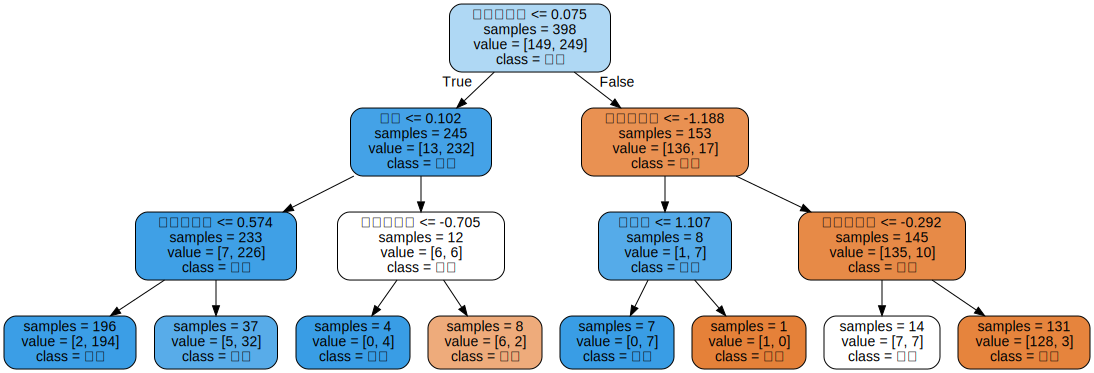

In [13]:
# 得られた graphviz のデータをプロット
import graphviz
# ノートブック上で、graphvizの出力を可視化するために必要
from IPython.display import display, SVG

# notebook 上でプロットするためには、graphviz.Source に先ほど export_graphviz() 関数から得られた出力を与える
dot = graphviz.Source(out)
display(SVG(dot.pipe('svg')))